# Project 4


## First Part: Assignment – Preprocessing Data for scikit-learn

### Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import sys


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import seaborn as sns

### 1. Load data

In [54]:


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [55]:
df_reduced = df[[0,5,18]]
df_reduced.head()

,0,5,18
0,p,p,o
1,e,a,o
2,e,l,o
3,p,p,o
4,e,n,o


## Adding name columns

In [56]:
df_reduced.columns = ['class', 'odor', 'ring-number']
df_reduced.head()

,class,odor,ring-number
0,p,p,o
1,e,a,o
2,e,l,o
3,p,p,o
4,e,n,o


In [57]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(df_reduced.columns)):
    df_reduced[df_reduced.columns[column]] = encoder.fit_transform(df_reduced[df_reduced.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'n', 1: 'o', 2: 't'}]

## Exploratory data analysis

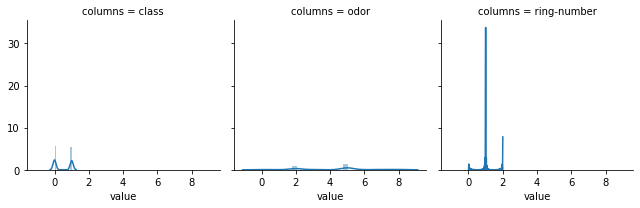

In [59]:

dfm = df_reduced.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

Plotting for column class


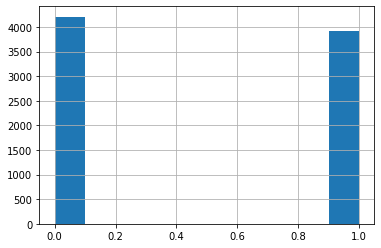

Plotting for column odor


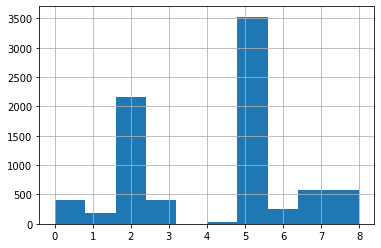

Plotting for column ring-number


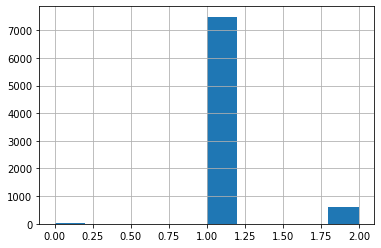

In [60]:
import matplotlib.pyplot as plt

for col in df_reduced.columns:
    hist = df_reduced[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

# Scatter Plots

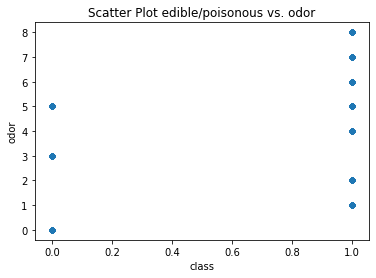

In [61]:
df_reduced.plot.scatter(x='class', y='odor', title= "Scatter Plot edible/poisonous vs. odor")

plt.show()



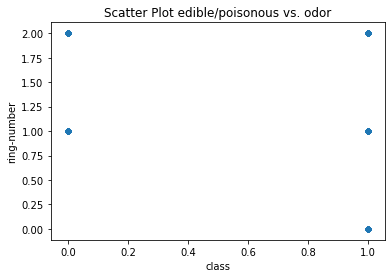

In [62]:
df_reduced.plot.scatter(x='class', y='ring-number', title= "Scatter Plot edible/poisonous vs. odor")

plt.show()



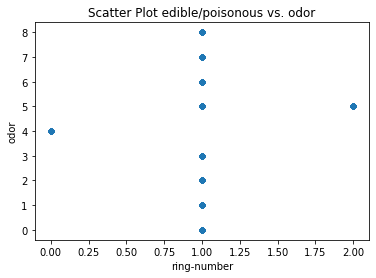

In [63]:
df_reduced.plot.scatter(x='ring-number', y='odor', title= "Scatter Plot edible/poisonous vs. odor")

plt.show()



I think there are some columns like gill size or color that could be helpful in predicting whether a specific mushroom is edible or poisonous. This is only an assumption, since without performing multiple tests we could not affirm it.

# Project 4

## Second Part: Predictive Analysis using scikit-learn

In [64]:
y = df_reduced['class']
X = df_reduced.drop('class', axis=1)

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,odor,ring-number
0,0.881938,-0.256132
1,-1.970316,-0.256132
2,-0.544189,-0.256132
3,0.881938,-0.256132
4,0.406562,-0.256132


### Subsets training y test

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [66]:
df_reduced.head()

,class,odor,ring-number
0,1,6,1
1,0,0,1
2,0,3,1
3,1,6,1
4,0,5,1


## I will use RandomForestClassifier

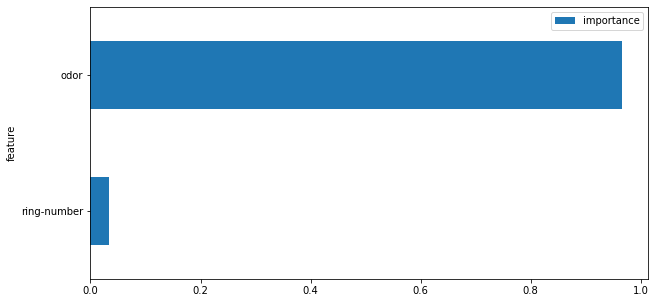

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=50,max_features='sqrt')
clf.fit(X, Y)

features = pd.DataFrame(dtype='object')
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 5))

In [71]:
features

,importance
feature,
ring-number,0.034349
odor,0.965651


# Conclusions

Based on the above analysis, we can determine that odor is more important than ring-number for the classification of mushrooms. We could do this analysis using more functions and making a better classifier. We could also do tests using another classifier, and maybe you could improve the result.

# Some tests more
## KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [76]:
y_pred_knn = knn.predict(X_test)

In [77]:
y_pred_knn

array([1, 1, 0, ..., 1, 1, 1])

## LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
logreg.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred_logreg = logreg.predict(X_test)

In [82]:
y_pred_logreg

array([0, 0, 0, ..., 1, 1, 1])

In [83]:
from sklearn import metrics

print("KNN accuracy")
print(metrics.accuracy_score(y_test, y_pred_knn))
print("Log Reg accuracy")
print(metrics.accuracy_score(y_test, y_pred_logreg))


KNN accuracy
0.9852307692307692
Log Reg accuracy
0.7101538461538461


In [84]:
logreg.coef_


array([[-0.15717381, -0.54527507]])

In [85]:
X.head()


,odor,ring-number
0,0.881938,-0.256132
1,-1.970316,-0.256132
2,-0.544189,-0.256132
3,0.881938,-0.256132
4,0.406562,-0.256132
